In the previous session, you were told which parameters to use for the prior normalinverse-gamma distribution. This time you have to choose the prior parameters yourself.
Given the information below, find reasonable values for the prior parameters of the
normal-inverse-gamma distribution — μ₀, ν₀, α₀, β₀. You will be asked to provide your
values for the prior hyperparameters in class, and to explain how you came up with them.
Information provided:

● The data are normally distributed. The error margins given below represent 1
standard deviation from the mean of the parameter.

● Constraint: the mean of the data is approximately 2.3± 0.5.

● Constraint: the variance of the data is approximately 2.75 ± 1.

● Find μ₀, ν₀, α₀, β₀ hyperparameters for the normal-inverse-gamma prior that
match this information.

In [10]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [90]:
# Normal-inverse-gamma prior hyperparameters
#mu = 2.3 (mean of data)
#beta/(alpha-1) = 2.75 (variance of data)
#beta/((alpha-1)*nu) = 0.5^2 (variance of mean)
#beta^2/((alpha-1)^2*(alpha-2)) = 1^2 (variance of variance)

#x[0] = mu
#x[1] = nu
#x[2] = alpha
#x[3] = beta

def f(x):
    return (x[0]-2.3)**2 + \
            ((x[3]/(x[2]-1))-2.75)**2 +\
            ((x[3]/((x[2]-1)*x[1]))-0.5**2)**2 +\
            ((x[3]**2/((x[2]-1)**2*(x[2]-2)))-1)**2

for x in [
np.array([1,2,3,4]),
np.array([-100,123,555,123]),]:
    
    result = minimize(f, x)
    parameters = result.x
    
    print('Started at', x)
    print('Ended at', parameters)
    print('f(%s) = %.6f' % (parameters, f(parameters)))
    print()

result

Started at [1 2 3 4]
Ended at [  2.29999925  11.00000373   9.56250715  23.54690388]
f([  2.29999925  11.00000373   9.56250715  23.54690388]) = 0.000000

Started at [-100  123  555  123]
Ended at [  2.29999509  11.00229472   9.56245886  23.5467246 ]
f([  2.29999509  11.00229472   9.56245886  23.5467246 ]) = 0.000000



      fun: 2.8083613893883725e-09
 hess_inv: array([[  4.57962599e-01,   4.30811433e-01,  -3.17057526e-01,
         -1.23870965e+00],
       [  4.30811433e-01,   6.99449089e+02,   1.45642139e+01,
          6.02966155e+01],
       [ -3.17057526e-01,   1.45642139e+01,   4.14381800e+01,
          1.34810569e+02],
       [ -1.23870965e+00,   6.02966155e+01,   1.34810569e+02,
          4.61664566e+02]])
      jac: array([ -9.79589958e-06,   2.38707209e-06,   4.20309609e-06,
        -1.74548925e-06])
  message: 'Optimization terminated successfully.'
     nfev: 642
      nit: 80
     njev: 107
   status: 0
  success: True
        x: array([  2.29999509,  11.00229472,   9.56245886,  23.5467246 ])

In [86]:
from scipy import stats
import seaborn as sns

def norminvgamma_rvs(mu, nu, alpha, beta, size=1):
    '''
    Generate n samples from the normal-inverse-gamma distribution. This function
    returns a (size x 2) matrix where each row contains a sample, (x, sigma2).
    '''
    sigma2 = stats.invgamma.rvs(a=alpha, scale=beta, size=size)  # Sample sigma^2 from the inverse-gamma
    x = stats.norm.rvs(loc=mu, scale=np.sqrt(sigma2 / nu), size=size)  # Sample x from the normal
    return np.vstack((x, sigma2)).transpose()

samples = norminvgamma_rvs(parameters[0], parameters[1],  parameters[2], parameters[3], size=10000)

#one standard deviation!
print("68% confidence interval for mean:", (np.percentile(samples[:,0], 16), np.percentile(samples[:,0], 84)))
print("68% confidence interval for variance:", (np.percentile(samples[:,1], 16), np.percentile(samples[:,1], 84)))

print(samples[:5])

68% confidence interval for mean: (1.8198299834818801, 2.7917702943869673)
68% confidence interval for variance: (1.8739424421400996, 3.6167483143306223)
[[ 1.71922963  2.48842167]
 [ 2.12097675  2.45251538]
 [ 2.13919495  1.73927031]
 [ 2.14533051  2.34509965]
 [ 2.92240115  2.76197595]]


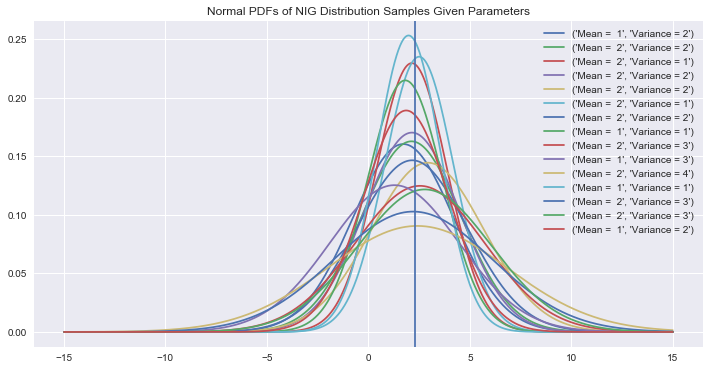

In [87]:
plt.figure(figsize=(12, 6))
x = np.linspace(-15,15,10000)

for i in range(15):
    plt.plot(x, stats.norm.pdf(x, loc = samples[i][0], scale=samples[i][1]), \
             label= ('Mean =  %i' % samples[i][0],'Variance = %i' % samples[i][1]))

plt.axvline(x=2.3)
plt.title(r'Normal PDFs of NIG Distribution Samples Given Parameters')
plt.legend() # Show the legend in the top right corner

plt.show()

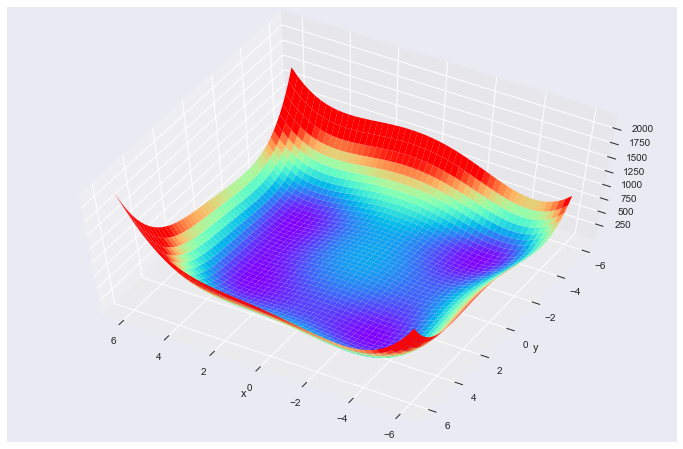

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # Color maps

# Set up figure and 3d axes
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

# Make the data to plot
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2

# Plot a surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow, vmin=0, vmax=800)
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(60, 120) # Rotate 3d axes for a better view
plt.show()

In [65]:
#Z = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2
def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

for x_initial in [
np.array([-4, -4]),
np.array([2, -2]),
np.array([2, 2]),
np.array([-4, 4])
]:
    result = minimize(f, x_initial)
    x_final = result.x
    print('Started at', x_initial)
    print('Ended at', x_final)
    print('f(%s) = %.6f' % (x_final, f(x_final)))
    print()

Started at [-4 -4]
Ended at [-3.77931027 -3.283186  ]
f([-3.77931027 -3.283186  ]) = 0.000000

Started at [ 2 -2]
Ended at [ 3.58442833 -1.84812655]
f([ 3.58442833 -1.84812655]) = 0.000000

Started at [2 2]
Ended at [ 3.00000003  2.00000002]
f([ 3.00000003  2.00000002]) = 0.000000

Started at [-4  4]
Ended at [-2.80511803  3.13131251]
f([-2.80511803  3.13131251]) = 0.000000

